In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model

datasetPath = "dataset\\data_batch_"

In [2]:
def unpickle(path_batch):
    with open(path_batch, 'rb') as fo:
        batch = pickle.load(fo, encoding='latin1')
    features = batch['data'].reshape((len(batch['data']), 3, 32, 32)).transpose(0, 2, 3, 1)
    labels = batch['labels']
        
    return features, labels

In [3]:
def get_label_names():
    with open("dataset\\batches.meta", 'rb') as fo:
        data = pickle.load(fo, encoding='latin1')
    return (data['label_names'])

In [4]:
def display_batch_stat(batch_nb):
    features, labels = unpickle(datasetPath + str(batch_nb))
    print("Batch N° %s" % str(batch_nb), "\n")
    print("Number of Samples in batch %s" % str(len(features)), "\n")
    counts =  [[x, labels.count(x)] for x in set(labels)]
    for c in counts:
        print( "%s = %d <=> %.2f %s" % (label_names[c[0]], c[1], (100 * c[1]) / len(features), "%"))
    

In [5]:
label_names = get_label_names()
for i in range(1, 5):
    display_batch_stat(i)

Batch N° 1 

Number of Samples in batch 10000 

airplane = 1005 <=> 10.05 %
automobile = 974 <=> 9.74 %
bird = 1032 <=> 10.32 %
cat = 1016 <=> 10.16 %
deer = 999 <=> 9.99 %
dog = 937 <=> 9.37 %
frog = 1030 <=> 10.30 %
horse = 1001 <=> 10.01 %
ship = 1025 <=> 10.25 %
truck = 981 <=> 9.81 %
Batch N° 2 

Number of Samples in batch 10000 

airplane = 984 <=> 9.84 %
automobile = 1007 <=> 10.07 %
bird = 1010 <=> 10.10 %
cat = 995 <=> 9.95 %
deer = 1010 <=> 10.10 %
dog = 988 <=> 9.88 %
frog = 1008 <=> 10.08 %
horse = 1026 <=> 10.26 %
ship = 987 <=> 9.87 %
truck = 985 <=> 9.85 %
Batch N° 3 

Number of Samples in batch 10000 

airplane = 994 <=> 9.94 %
automobile = 1042 <=> 10.42 %
bird = 965 <=> 9.65 %
cat = 997 <=> 9.97 %
deer = 990 <=> 9.90 %
dog = 1029 <=> 10.29 %
frog = 978 <=> 9.78 %
horse = 1015 <=> 10.15 %
ship = 961 <=> 9.61 %
truck = 1029 <=> 10.29 %
Batch N° 4 

Number of Samples in batch 10000 

airplane = 1003 <=> 10.03 %
automobile = 963 <=> 9.63 %
bird = 1041 <=> 10.41 %
cat = 97

In [6]:
features, labels = unpickle("dataset\\data_batch_1")

In [7]:
X = features.flatten()

In [8]:
labels[1]

9

In [9]:
features[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

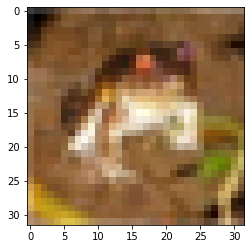

In [10]:
X = features.flatten().reshape(10000, 32*32*3)
plt.imshow(X[0].reshape(32, 32, 3))


In [46]:
X = features.flatten().reshape(10000, 32*32*3)
Y = np.asarray(labels)
Y_all = []
model_all = []

def linear_model(X_param, Y_param, activation_param, optimizer_param, loss_param, batch_size_param, epochs_param):
    model = tf.keras.Sequential()
    model.add(Dense(1, activation=activation_param, input_dim=32*32*3))
    model.compile(optimizer=optimizer_param, loss=loss_param, metrics=["accuracy"])

    model.fit(X_param, Y_param, batch_size=batch_size_param, verbose=1, epochs=epochs_param)
    return model


for i in range(10):
    Y_all.append(np.array([1 if y == i else 0 for y in Y]))
    model_all.append(linear_model(X, Y_all[i], "sigmoid", "adam", "binary_crossentropy", 10000, 200))


Train on 10000 samples
Epoch 1/200
10000/10000 [==============================] - 0s 28us/sample - loss: 71.8802 - accuracy: 0.2572
Epoch 2/200
10000/10000 [==============================] - 0s 5us/sample - loss: 39.2200 - accuracy: 0.8926
Epoch 3/200
10000/10000 [==============================] - 0s 5us/sample - loss: 62.4662 - accuracy: 0.8988
Epoch 4/200
10000/10000 [==============================] - 0s 5us/sample - loss: 75.3576 - accuracy: 0.8992
Epoch 5/200
10000/10000 [==============================] - 0s 5us/sample - loss: 81.3219 - accuracy: 0.8995
Epoch 6/200
10000/10000 [==============================] - 0s 5us/sample - loss: 82.1782 - accuracy: 0.8995
Epoch 7/200
10000/10000 [==============================] - 0s 5us/sample - loss: 79.0274 - accuracy: 0.8995
Epoch 8/200
10000/10000 [==============================] - 0s 5us/sample - loss: 72.6075 - accuracy: 0.8994
Epoch 9/200
10000/10000 [==============================] - 0s 5us/sample - loss: 63.4499 - accuracy: 0.8992
Epoc

Epoch 77/200
10000/10000 [==============================] - 0s 5us/sample - loss: 6.0557 - accuracy: 0.8307
Epoch 78/200
10000/10000 [==============================] - 0s 5us/sample - loss: 6.1093 - accuracy: 0.8139
Epoch 79/200
10000/10000 [==============================] - 0s 5us/sample - loss: 5.9976 - accuracy: 0.8226
Epoch 80/200
10000/10000 [==============================] - 0s 5us/sample - loss: 5.9561 - accuracy: 0.8406
Epoch 81/200
10000/10000 [==============================] - 0s 5us/sample - loss: 5.9679 - accuracy: 0.8457
Epoch 82/200
10000/10000 [==============================] - 0s 5us/sample - loss: 5.8684 - accuracy: 0.8383
Epoch 83/200
10000/10000 [==============================] - 0s 5us/sample - loss: 5.8464 - accuracy: 0.8215
Epoch 84/200
10000/10000 [==============================] - 0s 5us/sample - loss: 5.8324 - accuracy: 0.8177
Epoch 85/200
10000/10000 [==============================] - 0s 5us/sample - loss: 5.7491 - accuracy: 0.8314
Epoch 86/200
10000/10000 [==

Epoch 153/200
10000/10000 [==============================] - 0s 6us/sample - loss: 4.3581 - accuracy: 0.8315
Epoch 154/200
10000/10000 [==============================] - 0s 6us/sample - loss: 4.3442 - accuracy: 0.8335
Epoch 155/200
10000/10000 [==============================] - 0s 7us/sample - loss: 4.3303 - accuracy: 0.8330
Epoch 156/200
10000/10000 [==============================] - 0s 6us/sample - loss: 4.3166 - accuracy: 0.8320
Epoch 157/200
10000/10000 [==============================] - 0s 6us/sample - loss: 4.3029 - accuracy: 0.8326
Epoch 158/200
10000/10000 [==============================] - 0s 6us/sample - loss: 4.2893 - accuracy: 0.8336
Epoch 159/200
10000/10000 [==============================] - 0s 6us/sample - loss: 4.2757 - accuracy: 0.8330
Epoch 160/200
10000/10000 [==============================] - 0s 6us/sample - loss: 4.2622 - accuracy: 0.8329
Epoch 161/200
10000/10000 [==============================] - 0s 6us/sample - loss: 4.2487 - accuracy: 0.8340
Epoch 162/200
10000

10000/10000 [==============================] - 0s 5us/sample - loss: 9.4297 - accuracy: 0.7945
Epoch 29/200
10000/10000 [==============================] - 0s 5us/sample - loss: 10.2269 - accuracy: 0.7625
Epoch 30/200
10000/10000 [==============================] - 0s 5us/sample - loss: 8.4678 - accuracy: 0.8343
Epoch 31/200
10000/10000 [==============================] - 0s 6us/sample - loss: 8.6543 - accuracy: 0.8732
Epoch 32/200
10000/10000 [==============================] - 0s 6us/sample - loss: 9.3182 - accuracy: 0.8832
Epoch 33/200
10000/10000 [==============================] - 0s 5us/sample - loss: 9.0938 - accuracy: 0.8829
Epoch 34/200
10000/10000 [==============================] - 0s 6us/sample - loss: 8.1965 - accuracy: 0.8707
Epoch 35/200
10000/10000 [==============================] - 0s 6us/sample - loss: 7.9641 - accuracy: 0.8352
Epoch 36/200
10000/10000 [==============================] - 0s 5us/sample - loss: 8.6971 - accuracy: 0.7940
Epoch 37/200
10000/10000 [==============

Epoch 104/200
10000/10000 [==============================] - 0s 6us/sample - loss: 4.1818 - accuracy: 0.8681
Epoch 105/200
10000/10000 [==============================] - 0s 5us/sample - loss: 4.1560 - accuracy: 0.8686
Epoch 106/200
10000/10000 [==============================] - 0s 6us/sample - loss: 4.1305 - accuracy: 0.8669
Epoch 107/200
10000/10000 [==============================] - 0s 6us/sample - loss: 4.1050 - accuracy: 0.8667
Epoch 108/200
10000/10000 [==============================] - 0s 6us/sample - loss: 4.0805 - accuracy: 0.8685
Epoch 109/200
10000/10000 [==============================] - 0s 5us/sample - loss: 4.0553 - accuracy: 0.8685
Epoch 110/200
10000/10000 [==============================] - 0s 6us/sample - loss: 4.0317 - accuracy: 0.8660
Epoch 111/200
10000/10000 [==============================] - 0s 7us/sample - loss: 4.0069 - accuracy: 0.8682
Epoch 112/200
10000/10000 [==============================] - 0s 7us/sample - loss: 3.9839 - accuracy: 0.8689
Epoch 113/200
10000

Epoch 180/200
10000/10000 [==============================] - 0s 7us/sample - loss: 2.8848 - accuracy: 0.8816
Epoch 181/200
10000/10000 [==============================] - 0s 6us/sample - loss: 2.8829 - accuracy: 0.8633
Epoch 182/200
10000/10000 [==============================] - 0s 7us/sample - loss: 2.9009 - accuracy: 0.8857
Epoch 183/200
10000/10000 [==============================] - 0s 6us/sample - loss: 2.8971 - accuracy: 0.8564
Epoch 184/200
10000/10000 [==============================] - 0s 7us/sample - loss: 2.9346 - accuracy: 0.8913
Epoch 185/200
10000/10000 [==============================] - 0s 7us/sample - loss: 2.8804 - accuracy: 0.8558
Epoch 186/200
10000/10000 [==============================] - 0s 7us/sample - loss: 2.8761 - accuracy: 0.8881
Epoch 187/200
10000/10000 [==============================] - 0s 6us/sample - loss: 2.8336 - accuracy: 0.8600
Epoch 188/200
10000/10000 [==============================] - 0s 6us/sample - loss: 2.8273 - accuracy: 0.8861
Epoch 189/200
10000

Epoch 56/200
10000/10000 [==============================] - 0s 6us/sample - loss: 8.1462 - accuracy: 0.7851
Epoch 57/200
10000/10000 [==============================] - 0s 6us/sample - loss: 7.6378 - accuracy: 0.8208
Epoch 58/200
10000/10000 [==============================] - 0s 6us/sample - loss: 7.8369 - accuracy: 0.8486
Epoch 59/200
10000/10000 [==============================] - 0s 6us/sample - loss: 8.0109 - accuracy: 0.8564
Epoch 60/200
10000/10000 [==============================] - 0s 6us/sample - loss: 7.7359 - accuracy: 0.8489
Epoch 61/200
10000/10000 [==============================] - 0s 8us/sample - loss: 7.4480 - accuracy: 0.8234
Epoch 62/200
10000/10000 [==============================] - 0s 6us/sample - loss: 7.6558 - accuracy: 0.7943
Epoch 63/200
10000/10000 [==============================] - 0s 6us/sample - loss: 7.6289 - accuracy: 0.7930
Epoch 64/200
10000/10000 [==============================] - 0s 6us/sample - loss: 7.3157 - accuracy: 0.8199
Epoch 65/200
10000/10000 [==

Epoch 132/200
10000/10000 [==============================] - 0s 5us/sample - loss: 5.0907 - accuracy: 0.8210
Epoch 133/200
10000/10000 [==============================] - 0s 5us/sample - loss: 5.0678 - accuracy: 0.8230
Epoch 134/200
10000/10000 [==============================] - 0s 7us/sample - loss: 5.0448 - accuracy: 0.8231
Epoch 135/200
10000/10000 [==============================] - 0s 6us/sample - loss: 5.0223 - accuracy: 0.8204
Epoch 136/200
10000/10000 [==============================] - 0s 6us/sample - loss: 4.9998 - accuracy: 0.8212
Epoch 137/200
10000/10000 [==============================] - 0s 5us/sample - loss: 4.9777 - accuracy: 0.8229
Epoch 138/200
10000/10000 [==============================] - 0s 5us/sample - loss: 4.9558 - accuracy: 0.8229
Epoch 139/200
10000/10000 [==============================] - 0s 5us/sample - loss: 4.9341 - accuracy: 0.8214
Epoch 140/200
10000/10000 [==============================] - 0s 6us/sample - loss: 4.9127 - accuracy: 0.8215
Epoch 141/200
10000

Epoch 7/200
10000/10000 [==============================] - 0s 6us/sample - loss: 68.2259 - accuracy: 0.8984
Epoch 8/200
10000/10000 [==============================] - 0s 5us/sample - loss: 74.6633 - accuracy: 0.8984
Epoch 9/200
10000/10000 [==============================] - 0s 5us/sample - loss: 78.4705 - accuracy: 0.8984
Epoch 10/200
10000/10000 [==============================] - 0s 5us/sample - loss: 80.0297 - accuracy: 0.8984
Epoch 11/200
10000/10000 [==============================] - 0s 5us/sample - loss: 79.6356 - accuracy: 0.8984
Epoch 12/200
10000/10000 [==============================] - 0s 5us/sample - loss: 77.5227 - accuracy: 0.8984
Epoch 13/200
10000/10000 [==============================] - 0s 6us/sample - loss: 73.8817 - accuracy: 0.8984
Epoch 14/200
10000/10000 [==============================] - 0s 5us/sample - loss: 68.8712 - accuracy: 0.8984
Epoch 15/200
10000/10000 [==============================] - 0s 6us/sample - loss: 62.6247 - accuracy: 0.8984
Epoch 16/200
10000/100

Epoch 83/200
10000/10000 [==============================] - 0s 6us/sample - loss: 7.3350 - accuracy: 0.8278
Epoch 84/200
10000/10000 [==============================] - 0s 6us/sample - loss: 7.3468 - accuracy: 0.8123
Epoch 85/200
10000/10000 [==============================] - 0s 6us/sample - loss: 7.3414 - accuracy: 0.8080
Epoch 86/200
10000/10000 [==============================] - 0s 6us/sample - loss: 7.2278 - accuracy: 0.8218
Epoch 87/200
10000/10000 [==============================] - 0s 5us/sample - loss: 7.2181 - accuracy: 0.8350
Epoch 88/200
10000/10000 [==============================] - 0s 5us/sample - loss: 7.2165 - accuracy: 0.8390
Epoch 89/200
10000/10000 [==============================] - 0s 7us/sample - loss: 7.1389 - accuracy: 0.8334
Epoch 90/200
10000/10000 [==============================] - 0s 6us/sample - loss: 7.0884 - accuracy: 0.8219
Epoch 91/200
10000/10000 [==============================] - 0s 5us/sample - loss: 7.0973 - accuracy: 0.8121
Epoch 92/200
10000/10000 [==

Epoch 159/200
10000/10000 [==============================] - 0s 6us/sample - loss: 5.2243 - accuracy: 0.8272
Epoch 160/200
10000/10000 [==============================] - 0s 6us/sample - loss: 5.2038 - accuracy: 0.8269
Epoch 161/200
10000/10000 [==============================] - 0s 5us/sample - loss: 5.1836 - accuracy: 0.8262
Epoch 162/200
10000/10000 [==============================] - 0s 5us/sample - loss: 5.1634 - accuracy: 0.8260
Epoch 163/200
10000/10000 [==============================] - 0s 6us/sample - loss: 5.1435 - accuracy: 0.8269
Epoch 164/200
10000/10000 [==============================] - 0s 5us/sample - loss: 5.1237 - accuracy: 0.8268
Epoch 165/200
10000/10000 [==============================] - 0s 5us/sample - loss: 5.1040 - accuracy: 0.8261
Epoch 166/200
10000/10000 [==============================] - 0s 5us/sample - loss: 5.0846 - accuracy: 0.8263
Epoch 167/200
10000/10000 [==============================] - 0s 5us/sample - loss: 5.0653 - accuracy: 0.8272
Epoch 168/200
10000

10000/10000 [==============================] - 0s 6us/sample - loss: 11.8362 - accuracy: 0.6889
Epoch 35/200
10000/10000 [==============================] - 0s 5us/sample - loss: 9.2352 - accuracy: 0.7567
Epoch 36/200
10000/10000 [==============================] - 0s 5us/sample - loss: 8.0133 - accuracy: 0.8452
Epoch 37/200
10000/10000 [==============================] - 0s 5us/sample - loss: 9.3768 - accuracy: 0.8748
Epoch 38/200
10000/10000 [==============================] - 0s 5us/sample - loss: 10.0902 - accuracy: 0.8824
Epoch 39/200
10000/10000 [==============================] - 0s 5us/sample - loss: 9.4725 - accuracy: 0.8782
Epoch 40/200
10000/10000 [==============================] - 0s 5us/sample - loss: 8.0283 - accuracy: 0.8591
Epoch 41/200
10000/10000 [==============================] - 0s 6us/sample - loss: 7.6759 - accuracy: 0.7971
Epoch 42/200
10000/10000 [==============================] - 0s 5us/sample - loss: 9.2779 - accuracy: 0.7306
Epoch 43/200
10000/10000 [=============

Epoch 110/200
10000/10000 [==============================] - 0s 5us/sample - loss: 4.8537 - accuracy: 0.8309
Epoch 111/200
10000/10000 [==============================] - 0s 5us/sample - loss: 4.8355 - accuracy: 0.8266
Epoch 112/200
10000/10000 [==============================] - 0s 5us/sample - loss: 4.8131 - accuracy: 0.8298
Epoch 113/200
10000/10000 [==============================] - 0s 5us/sample - loss: 4.7945 - accuracy: 0.8326
Epoch 114/200
10000/10000 [==============================] - 0s 5us/sample - loss: 4.7732 - accuracy: 0.8315
Epoch 115/200
10000/10000 [==============================] - 0s 6us/sample - loss: 4.7542 - accuracy: 0.8277
Epoch 116/200
10000/10000 [==============================] - 0s 5us/sample - loss: 4.7338 - accuracy: 0.8284
Epoch 117/200
10000/10000 [==============================] - 0s 5us/sample - loss: 4.7146 - accuracy: 0.8319
Epoch 118/200
10000/10000 [==============================] - 0s 6us/sample - loss: 4.6948 - accuracy: 0.8316
Epoch 119/200
10000

Epoch 186/200
10000/10000 [==============================] - 0s 6us/sample - loss: 3.5992 - accuracy: 0.8316
Epoch 187/200
10000/10000 [==============================] - 0s 6us/sample - loss: 3.5860 - accuracy: 0.8317
Epoch 188/200
10000/10000 [==============================] - 0s 5us/sample - loss: 3.5728 - accuracy: 0.8316
Epoch 189/200
10000/10000 [==============================] - 0s 6us/sample - loss: 3.5597 - accuracy: 0.8316
Epoch 190/200
10000/10000 [==============================] - 0s 5us/sample - loss: 3.5467 - accuracy: 0.8315
Epoch 191/200
10000/10000 [==============================] - 0s 6us/sample - loss: 3.5337 - accuracy: 0.8316
Epoch 192/200
10000/10000 [==============================] - 0s 5us/sample - loss: 3.5208 - accuracy: 0.8314
Epoch 193/200
10000/10000 [==============================] - 0s 5us/sample - loss: 3.5080 - accuracy: 0.8312
Epoch 194/200
10000/10000 [==============================] - 0s 6us/sample - loss: 3.4952 - accuracy: 0.8315
Epoch 195/200
10000

10000/10000 [==============================] - 0s 6us/sample - loss: 8.7450 - accuracy: 0.7793
Epoch 62/200
10000/10000 [==============================] - 0s 6us/sample - loss: 8.3821 - accuracy: 0.7951
Epoch 63/200
10000/10000 [==============================] - 0s 5us/sample - loss: 8.0171 - accuracy: 0.8359
Epoch 64/200
10000/10000 [==============================] - 0s 6us/sample - loss: 8.1658 - accuracy: 0.8569
Epoch 65/200
10000/10000 [==============================] - 0s 5us/sample - loss: 8.2080 - accuracy: 0.8630
Epoch 66/200
10000/10000 [==============================] - 0s 5us/sample - loss: 7.9179 - accuracy: 0.8545
Epoch 67/200
10000/10000 [==============================] - 0s 5us/sample - loss: 7.6599 - accuracy: 0.8306
Epoch 68/200
10000/10000 [==============================] - 0s 6us/sample - loss: 7.7958 - accuracy: 0.8004
Epoch 69/200
10000/10000 [==============================] - 0s 5us/sample - loss: 7.7106 - accuracy: 0.8001
Epoch 70/200
10000/10000 [===============

Epoch 137/200
10000/10000 [==============================] - 0s 6us/sample - loss: 4.7908 - accuracy: 0.8391
Epoch 138/200
10000/10000 [==============================] - 0s 6us/sample - loss: 4.7647 - accuracy: 0.8412
Epoch 139/200
10000/10000 [==============================] - 0s 6us/sample - loss: 4.7392 - accuracy: 0.8415
Epoch 140/200
10000/10000 [==============================] - 0s 6us/sample - loss: 4.7136 - accuracy: 0.8403
Epoch 141/200
10000/10000 [==============================] - 0s 6us/sample - loss: 4.6887 - accuracy: 0.8392
Epoch 142/200
10000/10000 [==============================] - 0s 5us/sample - loss: 4.6637 - accuracy: 0.8400
Epoch 143/200
10000/10000 [==============================] - 0s 5us/sample - loss: 4.6392 - accuracy: 0.8412
Epoch 144/200
10000/10000 [==============================] - 0s 5us/sample - loss: 4.6149 - accuracy: 0.8410
Epoch 145/200
10000/10000 [==============================] - 0s 6us/sample - loss: 4.5909 - accuracy: 0.8398
Epoch 146/200
10000

10000/10000 [==============================] - 0s 6us/sample - loss: 37.6256 - accuracy: 0.8969
Epoch 13/200
10000/10000 [==============================] - 0s 6us/sample - loss: 36.9711 - accuracy: 0.8970
Epoch 14/200
10000/10000 [==============================] - 0s 6us/sample - loss: 34.5810 - accuracy: 0.8970
Epoch 15/200
10000/10000 [==============================] - 0s 6us/sample - loss: 30.6383 - accuracy: 0.8967
Epoch 16/200
10000/10000 [==============================] - 0s 6us/sample - loss: 25.3096 - accuracy: 0.8961
Epoch 17/200
10000/10000 [==============================] - 0s 5us/sample - loss: 18.7902 - accuracy: 0.8942
Epoch 18/200
10000/10000 [==============================] - 0s 5us/sample - loss: 11.7857 - accuracy: 0.8828
Epoch 19/200
10000/10000 [==============================] - 0s 6us/sample - loss: 9.7636 - accuracy: 0.7871
Epoch 20/200
10000/10000 [==============================] - 0s 5us/sample - loss: 23.4627 - accuracy: 0.5696
Epoch 21/200
10000/10000 [=======

Epoch 88/200
10000/10000 [==============================] - 0s 6us/sample - loss: 5.0203 - accuracy: 0.8509
Epoch 89/200
10000/10000 [==============================] - 0s 6us/sample - loss: 4.9893 - accuracy: 0.8418
Epoch 90/200
10000/10000 [==============================] - 0s 6us/sample - loss: 4.9735 - accuracy: 0.8388
Epoch 91/200
10000/10000 [==============================] - 0s 6us/sample - loss: 4.9263 - accuracy: 0.8446
Epoch 92/200
10000/10000 [==============================] - 0s 6us/sample - loss: 4.9053 - accuracy: 0.8521
Epoch 93/200
10000/10000 [==============================] - 0s 6us/sample - loss: 4.8809 - accuracy: 0.8535
Epoch 94/200
10000/10000 [==============================] - 0s 6us/sample - loss: 4.8406 - accuracy: 0.8477
Epoch 95/200
10000/10000 [==============================] - 0s 6us/sample - loss: 4.8228 - accuracy: 0.8414
Epoch 96/200
10000/10000 [==============================] - 0s 6us/sample - loss: 4.7925 - accuracy: 0.8430
Epoch 97/200
10000/10000 [==

Epoch 164/200
10000/10000 [==============================] - 0s 5us/sample - loss: 3.6357 - accuracy: 0.8514
Epoch 165/200
10000/10000 [==============================] - 0s 6us/sample - loss: 3.6241 - accuracy: 0.8516
Epoch 166/200
10000/10000 [==============================] - 0s 6us/sample - loss: 3.6125 - accuracy: 0.8512
Epoch 167/200
10000/10000 [==============================] - 0s 6us/sample - loss: 3.6010 - accuracy: 0.8512
Epoch 168/200
10000/10000 [==============================] - 0s 6us/sample - loss: 3.5896 - accuracy: 0.8518
Epoch 169/200
10000/10000 [==============================] - 0s 5us/sample - loss: 3.5781 - accuracy: 0.8515
Epoch 170/200
10000/10000 [==============================] - 0s 6us/sample - loss: 3.5668 - accuracy: 0.8513
Epoch 171/200
10000/10000 [==============================] - 0s 6us/sample - loss: 3.5555 - accuracy: 0.8517
Epoch 172/200
10000/10000 [==============================] - 0s 5us/sample - loss: 3.5443 - accuracy: 0.8523
Epoch 173/200
10000

Epoch 40/200
10000/10000 [==============================] - 0s 5us/sample - loss: 7.5938 - accuracy: 0.8097
Epoch 41/200
10000/10000 [==============================] - 0s 6us/sample - loss: 7.9570 - accuracy: 0.8677
Epoch 42/200
10000/10000 [==============================] - 0s 5us/sample - loss: 9.1943 - accuracy: 0.8848
Epoch 43/200
10000/10000 [==============================] - 0s 6us/sample - loss: 9.4088 - accuracy: 0.8855
Epoch 44/200
10000/10000 [==============================] - 0s 6us/sample - loss: 8.4458 - accuracy: 0.8808
Epoch 45/200
10000/10000 [==============================] - 0s 6us/sample - loss: 7.2266 - accuracy: 0.8506
Epoch 46/200
10000/10000 [==============================] - 0s 6us/sample - loss: 7.6414 - accuracy: 0.7868
Epoch 47/200
10000/10000 [==============================] - 0s 5us/sample - loss: 8.5580 - accuracy: 0.7475
Epoch 48/200
10000/10000 [==============================] - 0s 6us/sample - loss: 7.1530 - accuracy: 0.8094
Epoch 49/200
10000/10000 [==

Epoch 116/200
10000/10000 [==============================] - 0s 5us/sample - loss: 4.6915 - accuracy: 0.8503
Epoch 117/200
10000/10000 [==============================] - 0s 6us/sample - loss: 4.6708 - accuracy: 0.8469
Epoch 118/200
10000/10000 [==============================] - 0s 6us/sample - loss: 4.6506 - accuracy: 0.8468
Epoch 119/200
10000/10000 [==============================] - 0s 6us/sample - loss: 4.6288 - accuracy: 0.8485
Epoch 120/200
10000/10000 [==============================] - 0s 6us/sample - loss: 4.6096 - accuracy: 0.8509
Epoch 121/200
10000/10000 [==============================] - 0s 6us/sample - loss: 4.5885 - accuracy: 0.8495
Epoch 122/200
10000/10000 [==============================] - 0s 6us/sample - loss: 4.5688 - accuracy: 0.8475
Epoch 123/200
10000/10000 [==============================] - 0s 6us/sample - loss: 4.5492 - accuracy: 0.8478
Epoch 124/200
10000/10000 [==============================] - 0s 6us/sample - loss: 4.5291 - accuracy: 0.8501
Epoch 125/200
10000

Epoch 192/200
10000/10000 [==============================] - 0s 6us/sample - loss: 3.5175 - accuracy: 0.8505
Epoch 193/200
10000/10000 [==============================] - 0s 5us/sample - loss: 3.5061 - accuracy: 0.8507
Epoch 194/200
10000/10000 [==============================] - 0s 6us/sample - loss: 3.4948 - accuracy: 0.8510
Epoch 195/200
10000/10000 [==============================] - 0s 6us/sample - loss: 3.4836 - accuracy: 0.8509
Epoch 196/200
10000/10000 [==============================] - 0s 6us/sample - loss: 3.4724 - accuracy: 0.8511
Epoch 197/200
10000/10000 [==============================] - 0s 6us/sample - loss: 3.4613 - accuracy: 0.8509
Epoch 198/200
10000/10000 [==============================] - 0s 6us/sample - loss: 3.4503 - accuracy: 0.8510
Epoch 199/200
10000/10000 [==============================] - 0s 6us/sample - loss: 3.4394 - accuracy: 0.8508
Epoch 200/200
10000/10000 [==============================] - 0s 6us/sample - loss: 3.4285 - accuracy: 0.8511
Train on 10000 samp

Epoch 68/200
10000/10000 [==============================] - 0s 6us/sample - loss: 7.4380 - accuracy: 0.8539
Epoch 69/200
10000/10000 [==============================] - 0s 6us/sample - loss: 7.4806 - accuracy: 0.8572
Epoch 70/200
10000/10000 [==============================] - 0s 6us/sample - loss: 7.2859 - accuracy: 0.8523
Epoch 71/200
10000/10000 [==============================] - 0s 6us/sample - loss: 7.1540 - accuracy: 0.8384
Epoch 72/200
10000/10000 [==============================] - 0s 6us/sample - loss: 7.2277 - accuracy: 0.8242
Epoch 73/200
10000/10000 [==============================] - 0s 6us/sample - loss: 7.1195 - accuracy: 0.8269
Epoch 74/200
10000/10000 [==============================] - 0s 6us/sample - loss: 6.9633 - accuracy: 0.8429
Epoch 75/200
10000/10000 [==============================] - 0s 6us/sample - loss: 6.9921 - accuracy: 0.8519
Epoch 76/200
10000/10000 [==============================] - 0s 6us/sample - loss: 6.9450 - accuracy: 0.8531
Epoch 77/200
10000/10000 [==

Epoch 144/200
10000/10000 [==============================] - 0s 5us/sample - loss: 4.6480 - accuracy: 0.8371
Epoch 145/200
10000/10000 [==============================] - 0s 6us/sample - loss: 4.6283 - accuracy: 0.8362
Epoch 146/200
10000/10000 [==============================] - 0s 5us/sample - loss: 4.6088 - accuracy: 0.8359
Epoch 147/200
10000/10000 [==============================] - 0s 6us/sample - loss: 4.5896 - accuracy: 0.8367
Epoch 148/200
10000/10000 [==============================] - 0s 5us/sample - loss: 4.5705 - accuracy: 0.8366
Epoch 149/200
10000/10000 [==============================] - 0s 5us/sample - loss: 4.5517 - accuracy: 0.8358
Epoch 150/200
10000/10000 [==============================] - 0s 6us/sample - loss: 4.5330 - accuracy: 0.8356
Epoch 151/200
10000/10000 [==============================] - 0s 5us/sample - loss: 4.5146 - accuracy: 0.8361
Epoch 152/200
10000/10000 [==============================] - 0s 5us/sample - loss: 4.4963 - accuracy: 0.8359
Epoch 153/200
10000

10000/10000 [==============================] - 0s 5us/sample - loss: 24.0910 - accuracy: 0.4858
Epoch 20/200
10000/10000 [==============================] - 0s 6us/sample - loss: 9.1667 - accuracy: 0.8358
Epoch 21/200
10000/10000 [==============================] - 0s 6us/sample - loss: 13.6468 - accuracy: 0.8918
Epoch 22/200
10000/10000 [==============================] - 0s 5us/sample - loss: 18.5860 - accuracy: 0.8994
Epoch 23/200
10000/10000 [==============================] - 0s 5us/sample - loss: 21.6031 - accuracy: 0.9012
Epoch 24/200
10000/10000 [==============================] - 0s 5us/sample - loss: 22.6586 - accuracy: 0.9015
Epoch 25/200
10000/10000 [==============================] - 0s 5us/sample - loss: 21.8970 - accuracy: 0.9011
Epoch 26/200
10000/10000 [==============================] - 0s 5us/sample - loss: 19.4869 - accuracy: 0.9008
Epoch 27/200
10000/10000 [==============================] - 0s 5us/sample - loss: 15.6456 - accuracy: 0.8983
Epoch 28/200
10000/10000 [=======

Epoch 95/200
10000/10000 [==============================] - 0s 5us/sample - loss: 4.9954 - accuracy: 0.8644
Epoch 96/200
10000/10000 [==============================] - 0s 5us/sample - loss: 4.9745 - accuracy: 0.8651
Epoch 97/200
10000/10000 [==============================] - 0s 6us/sample - loss: 4.9356 - accuracy: 0.8616
Epoch 98/200
10000/10000 [==============================] - 0s 5us/sample - loss: 4.9171 - accuracy: 0.8556
Epoch 99/200
10000/10000 [==============================] - 0s 5us/sample - loss: 4.8955 - accuracy: 0.8542
Epoch 100/200
10000/10000 [==============================] - 0s 5us/sample - loss: 4.8616 - accuracy: 0.8586
Epoch 101/200
10000/10000 [==============================] - 0s 5us/sample - loss: 4.8460 - accuracy: 0.8628
Epoch 102/200
10000/10000 [==============================] - 0s 6us/sample - loss: 4.8216 - accuracy: 0.8624
Epoch 103/200
10000/10000 [==============================] - 0s 6us/sample - loss: 4.7940 - accuracy: 0.8582
Epoch 104/200
10000/1000

Epoch 171/200
10000/10000 [==============================] - 0s 5us/sample - loss: 3.7025 - accuracy: 0.8633
Epoch 172/200
10000/10000 [==============================] - 0s 5us/sample - loss: 3.6906 - accuracy: 0.8632
Epoch 173/200
10000/10000 [==============================] - 0s 5us/sample - loss: 3.6788 - accuracy: 0.8634
Epoch 174/200
10000/10000 [==============================] - 0s 6us/sample - loss: 3.6671 - accuracy: 0.8636
Epoch 175/200
10000/10000 [==============================] - 0s 6us/sample - loss: 3.6555 - accuracy: 0.8634
Epoch 176/200
10000/10000 [==============================] - 0s 5us/sample - loss: 3.6439 - accuracy: 0.8634
Epoch 177/200
10000/10000 [==============================] - 0s 5us/sample - loss: 3.6325 - accuracy: 0.8639
Epoch 178/200
10000/10000 [==============================] - 0s 5us/sample - loss: 3.6211 - accuracy: 0.8639
Epoch 179/200
10000/10000 [==============================] - 0s 5us/sample - loss: 3.6098 - accuracy: 0.8635
Epoch 180/200
10000

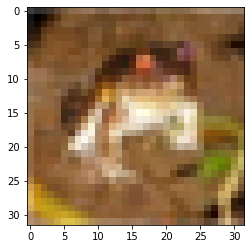

In [47]:
plt.imshow(X[0].reshape(32, 32, 3))

In [48]:
np.shape(X[0].reshape(3072))
print(X[0])

[ 59  62  63 ... 123  92  72]


In [54]:
def predict_liear(model_all, X):
    res = []
    for model in model_all:
        img = X.reshape(1, 3072)
        res.append(model.predict(img)[0][0])
    print(res)
    return res.index(max(res))
    

img_index = 335
res = predict_liear(model_all, X[img_index])

print("Image predicted is a: " + label_names[res])
print("Image is supposed to be a: " + label_names[Y[img_index]])


[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Image predicted is a: airplane
Image is supposed to be a: bird


In [45]:
label_names

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']